In [35]:
import pandas as pd
import numpy as np
import acquire
import matplotlib.pyplot as plt
import seaborn as sns
import wrangle
from scipy import stats

**Lets acquire data using the get_data function from acquire module**

In [36]:


zillow = acquire.get_data()

**Lets take a look at our dataframe**

In [37]:
zillow.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,regionidcounty,regionidzip,finishedsquarefeet12,fips,fullbathcnt,lotsizesquarefeet,propertylandusedesc,transactiondate,taxamount,taxvaluedollarcnt
0,2061546,11289917,2.0,3.0,2.0,3101.0,97318.0,1458.0,6037.0,2.0,8284.0,Single Family Residential,2017-06-23,2319.90,136104.0
1,1834372,11705026,1.0,2.0,1.0,3101.0,96018.0,1421.0,6037.0,1.0,6707.0,Single Family Residential,2017-06-30,543.69,35606.0
2,1923117,14269464,3.0,4.0,3.0,1286.0,96958.0,2541.0,6059.0,3.0,4975.0,Single Family Residential,2017-06-01,9819.72,880456.0
3,2121349,11389003,2.0,3.0,2.0,3101.0,96037.0,1650.0,6037.0,2.0,7300.0,Single Family Residential,2017-06-01,7673.19,614000.0
4,2093710,11967869,1.0,2.0,1.0,3101.0,96023.0,693.0,6037.0,1.0,2908.0,Single Family Residential,2017-06-29,3267.47,274237.0


**Getting some information about our data**

In [38]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15035 non-null  int64  
 1   parcelid              15035 non-null  int64  
 2   bathroomcnt           15035 non-null  float64
 3   bedroomcnt            15035 non-null  float64
 4   calculatedbathnbr     14989 non-null  float64
 5   regionidcounty        15035 non-null  float64
 6   regionidzip           15026 non-null  float64
 7   finishedsquarefeet12  14968 non-null  float64
 8   fips                  15035 non-null  float64
 9   fullbathcnt           14989 non-null  float64
 10  lotsizesquarefeet     14931 non-null  float64
 11  propertylandusedesc   15035 non-null  object 
 12  transactiondate       15035 non-null  object 
 13  taxamount             15035 non-null  float64
 14  taxvaluedollarcnt     15035 non-null  float64
dtypes: float64(11), int

**Takeaways:**
- shape = 15035, 15
- some null values
- few object type that might need conversion

## Preparation Phase

**Lets check for null values**

In [39]:
zillow.isnull().sum()

id                        0
parcelid                  0
bathroomcnt               0
bedroomcnt                0
calculatedbathnbr        46
regionidcounty            0
regionidzip               9
finishedsquarefeet12     67
fips                      0
fullbathcnt              46
lotsizesquarefeet       104
propertylandusedesc       0
transactiondate           0
taxamount                 0
taxvaluedollarcnt         0
dtype: int64

**both fullbathcnt and calculatedbathnbr have 46 missing values, lets see if they are for same observations**

In [40]:



zillow.sort_values(by = 'calculatedbathnbr').tail(50)

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,regionidcounty,regionidzip,finishedsquarefeet12,fips,fullbathcnt,lotsizesquarefeet,propertylandusedesc,transactiondate,taxamount,taxvaluedollarcnt
6930,1510914,11655138,9.0,6.0,9.0,3101.0,96086.0,15450.0,6037.0,9.0,165088.0,Single Family Residential,2017-05-31,121131.53,10071018.0
14423,2004396,11995760,9.0,7.0,9.0,3101.0,96017.0,7481.0,6037.0,9.0,7425.0,Single Family Residential,2017-06-30,43608.22,3617167.0
12132,2731480,11095530,10.0,10.0,10.0,3101.0,96339.0,4294.0,6037.0,10.0,16695.0,Single Family Residential,2017-06-22,8871.35,812200.0
3868,1824424,11640165,11.0,7.0,11.0,3101.0,96086.0,11478.0,6037.0,11.0,33617.0,Single Family Residential,2017-05-17,181533.24,15623925.0
5,496818,11696784,0.0,0.0,NaN,3101.0,96024.0,1378.0,6037.0,NaN,7500.0,Single Family Residential,2017-06-16,2135.39,168828.0
111,2323388,14252582,2.5,3.0,NaN,1286.0,97006.0,NaN,6059.0,NaN,18719.0,Single Family Residential,2017-05-01,2079.52,162456.0
209,2434313,11392193,0.0,0.0,NaN,3101.0,96024.0,2276.0,6037.0,NaN,10772.0,Single Family Residential,2017-05-01,1609.95,101792.0
280,1071389,14466991,0.0,0.0,NaN,1286.0,96989.0,NaN,6059.0,NaN,105970.0,Single Family Residential,2017-05-01,25740.28,2493444.0
293,2776735,11266326,0.0,0.0,NaN,3101.0,97319.0,400.0,6037.0,NaN,55016.0,Single Family Residential,2017-05-01,703.30,49627.0
746,1735776,11938527,0.0,0.0,NaN,3101.0,95993.0,389.0,6037.0,NaN,7681.0,Single Family Residential,2017-05-03,4059.62,319396.0


In [41]:
# turns out they are so we can drop these observations

zillow = zillow[~zillow.fullbathcnt.isna()]

In [42]:
zillow.isnull().sum()

# lets drop null observations for finishedsquarefeet12 columns

zillow = zillow[~zillow.finishedsquarefeet12.isna()]

zillow.sort_values(by = 'lotsizesquarefeet', ascending = False).tail(50)


#imputing value for lotsizesquare using mode, median or average will affect the data as they come out to be 
#higher so we will just drop them


zillow = zillow[~zillow.lotsizesquarefeet.isna()]

In [43]:
zillow = zillow[~zillow.regionidzip.isna()]

In [44]:
zillow.isnull().sum()

id                      0
parcelid                0
bathroomcnt             0
bedroomcnt              0
calculatedbathnbr       0
regionidcounty          0
regionidzip             0
finishedsquarefeet12    0
fips                    0
fullbathcnt             0
lotsizesquarefeet       0
propertylandusedesc     0
transactiondate         0
taxamount               0
taxvaluedollarcnt       0
dtype: int64

In [45]:
print(len(zillow))

print((zillow.bathroomcnt == zillow.calculatedbathnbr).sum())

# basically number of bathrooms and calculatedbathnbr mean the same thing so we can drop one of these column

14849
14849


In [46]:
# since all of these observations are for single family home, and their transaction took place between the month of may and
# june of 2017. We can drop these columns. Also, they wont mean anything to our model and id is also not a significant columns for us



zillow = zillow.drop(columns = ['propertylandusedesc', 'fullbathcnt','transactiondate', 'parcelid', 'id', 'calculatedbathnbr'])

In [47]:
# renaming the column for more readeability

zillow = zillow.rename(columns = {'bathroomcnt':'numberofbathrooms', 'bedroomcnt':'numberofbedrooms', 
                         'regionidcounty':'countyid', 'regionidzip':'zipcode', 'finishedsquarefeet12':'size_in_squarefeet', 
                        'lotsizesquarefeet':'lotsize', 'taxamount': 'tax', 
                        'taxvaluedollarcnt':'property_value'})

In [48]:
zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,lotsize,tax,property_value
0,2.0,3.0,3101.0,97318.0,1458.0,6037.0,8284.0,2319.90,136104.0
1,1.0,2.0,3101.0,96018.0,1421.0,6037.0,6707.0,543.69,35606.0
2,3.0,4.0,1286.0,96958.0,2541.0,6059.0,4975.0,9819.72,880456.0
3,2.0,3.0,3101.0,96037.0,1650.0,6037.0,7300.0,7673.19,614000.0
4,1.0,2.0,3101.0,96023.0,693.0,6037.0,2908.0,3267.47,274237.0
...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,6059.0,7800.0,5718.72,458903.0
15031,3.0,5.0,1286.0,97067.0,2735.0,6059.0,7100.0,1465.88,115387.0
15032,2.0,3.0,3101.0,96523.0,1536.0,6037.0,8818.0,3519.78,297097.0
15033,3.0,5.0,1286.0,97065.0,2655.0,6059.0,6000.0,8065.50,746963.0


In [53]:
# trying to calulate the tax rate for these properties and creating a separate columns that stores the tax rate



zillow['tax_rate'] = (zillow.tax/zillow.property_value) * 100

zillow.sort_values(by = 'tax_rate', ascending = False)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,lotsize,tax,property_value,tax_rate
9762,1.0,2.0,3101.0,96023.0,572.0,6037.0,2968.0,9544.07,21074.0,45.288365
1123,1.0,3.0,2061.0,97089.0,1504.0,6111.0,96658.0,17582.50,59629.0,29.486491
3477,2.0,3.0,3101.0,96361.0,1186.0,6037.0,9464.0,13096.41,47163.0,27.768399
7895,2.0,3.0,3101.0,96523.0,1754.0,6037.0,12027.0,11541.02,56697.0,20.355610
5553,2.0,3.0,3101.0,96486.0,1488.0,6037.0,8451.0,24234.62,132742.0,18.256935
...,...,...,...,...,...,...,...,...,...,...
845,2.5,3.0,1286.0,96962.0,2473.0,6059.0,3600.0,2058.36,897999.0,0.229216
5312,2.0,3.0,1286.0,96964.0,1185.0,6059.0,6250.0,1008.26,588818.0,0.171235
4539,2.0,3.0,3101.0,96436.0,1372.0,6037.0,7560.0,120.84,81141.0,0.148926
3403,1.0,2.0,3101.0,96127.0,936.0,6037.0,5750.0,963.15,866785.0,0.111118


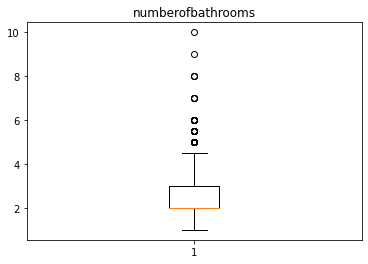

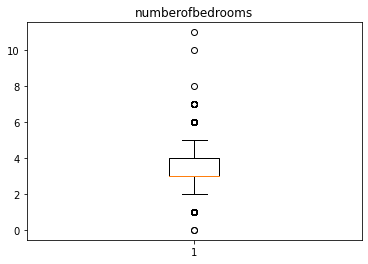

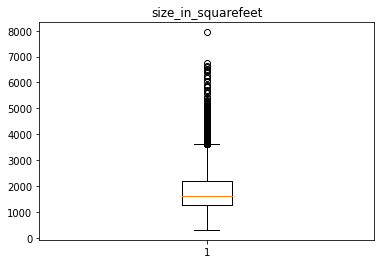

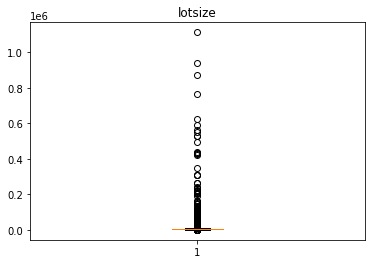

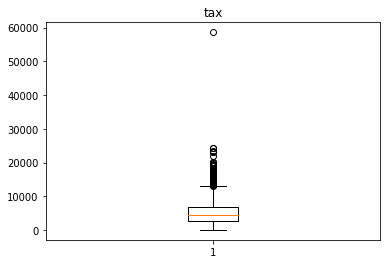

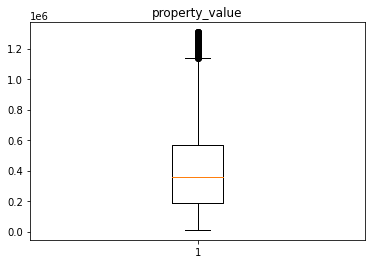

In [57]:
# lets check if there are any outliers in our data


# plt.figure(figsize = (15,20))


for col in ['numberofbathrooms', 'numberofbedrooms', 'size_in_squarefeet', 'lotsize', 'tax', 'property_value']:
    plt.boxplot(zillow[col])
    plt.title(col)
    plt.show()
# plt.boxplot(zillow.property_value)
# plt.show()

<AxesSubplot:>

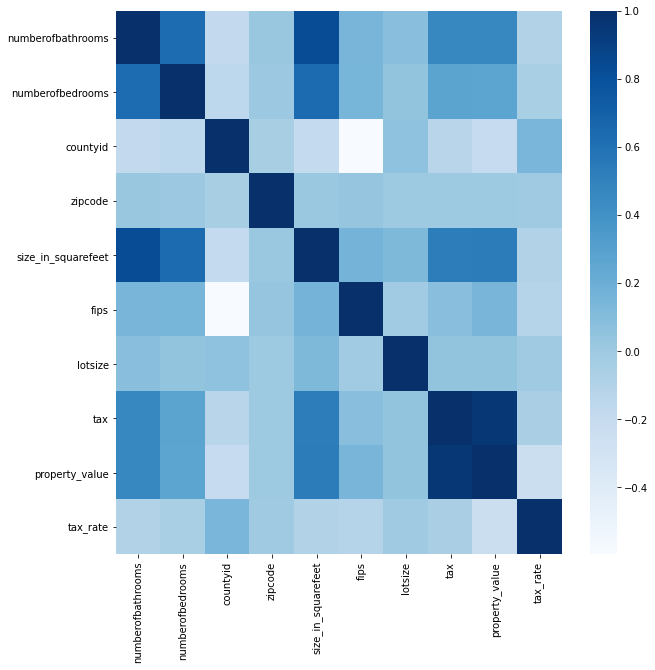

In [63]:

plt.figure(figsize = (10,10))
sns.heatmap(zillow.corr(), cmap = 'Blues')

<AxesSubplot:xlabel='property_value'>

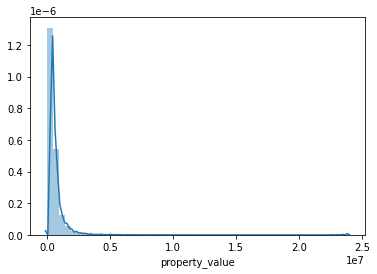

In [51]:
sns.distplot(zillow.property_value)

In [64]:
# there are some outliers in the data. So, we will remove them 

q1 = zillow.property_value.quantile(0.25)
q3 = zillow.property_value.quantile(0.75)

iqr = q3-q1

upper_outlier_mark = q3 + (1.5 * iqr)

zillow = zillow[zillow.property_value < upper_outlier_mark]


zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,lotsize,tax,property_value,tax_rate
0,2.0,3.0,3101.0,97318.0,1458.0,6037.0,8284.0,2319.90,136104.0,1.704505
1,1.0,2.0,3101.0,96018.0,1421.0,6037.0,6707.0,543.69,35606.0,1.526962
2,3.0,4.0,1286.0,96958.0,2541.0,6059.0,4975.0,9819.72,880456.0,1.115299
3,2.0,3.0,3101.0,96037.0,1650.0,6037.0,7300.0,7673.19,614000.0,1.249705
4,1.0,2.0,3101.0,96023.0,693.0,6037.0,2908.0,3267.47,274237.0,1.191477
...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,6059.0,7800.0,5718.72,458903.0,1.246172
15031,3.0,5.0,1286.0,97067.0,2735.0,6059.0,7100.0,1465.88,115387.0,1.270403
15032,2.0,3.0,3101.0,96523.0,1536.0,6037.0,8818.0,3519.78,297097.0,1.184724
15033,3.0,5.0,1286.0,97065.0,2655.0,6059.0,6000.0,8065.50,746963.0,1.079772


<AxesSubplot:xlabel='property_value'>

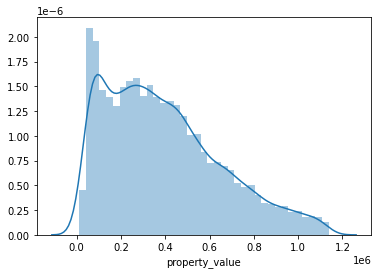

In [65]:
sns.distplot(zillow.property_value)

<AxesSubplot:xlabel='property_value'>

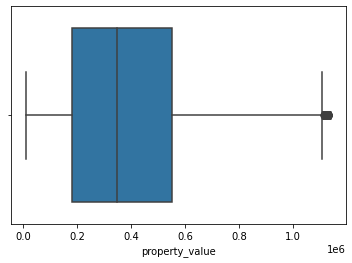

In [66]:
sns.boxplot(zillow.property_value)

#### We can get the fips information from following website
#### https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt
so,

6037: LA, 

6059: Orange,

6111: Ventura

### we will replace fips with these values 


In [67]:
zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,fips,lotsize,tax,property_value,tax_rate
0,2.0,3.0,3101.0,97318.0,1458.0,6037.0,8284.0,2319.90,136104.0,1.704505
1,1.0,2.0,3101.0,96018.0,1421.0,6037.0,6707.0,543.69,35606.0,1.526962
2,3.0,4.0,1286.0,96958.0,2541.0,6059.0,4975.0,9819.72,880456.0,1.115299
3,2.0,3.0,3101.0,96037.0,1650.0,6037.0,7300.0,7673.19,614000.0,1.249705
4,1.0,2.0,3101.0,96023.0,693.0,6037.0,2908.0,3267.47,274237.0,1.191477
...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,6059.0,7800.0,5718.72,458903.0,1.246172
15031,3.0,5.0,1286.0,97067.0,2735.0,6059.0,7100.0,1465.88,115387.0,1.270403
15032,2.0,3.0,3101.0,96523.0,1536.0,6037.0,8818.0,3519.78,297097.0,1.184724
15033,3.0,5.0,1286.0,97065.0,2655.0,6059.0,6000.0,8065.50,746963.0,1.079772


In [68]:
zillow.fips = zillow.fips.astype(int)



zillow = zillow.replace({'fips':{6037: 'LA', 6059: 'Orange', 6111: 'Ventura'}})

zillow = zillow.rename(columns = {'fips': 'County'})
zillow

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,County,lotsize,tax,property_value,tax_rate
0,2.0,3.0,3101.0,97318.0,1458.0,LA,8284.0,2319.90,136104.0,1.704505
1,1.0,2.0,3101.0,96018.0,1421.0,LA,6707.0,543.69,35606.0,1.526962
2,3.0,4.0,1286.0,96958.0,2541.0,Orange,4975.0,9819.72,880456.0,1.115299
3,2.0,3.0,3101.0,96037.0,1650.0,LA,7300.0,7673.19,614000.0,1.249705
4,1.0,2.0,3101.0,96023.0,693.0,LA,2908.0,3267.47,274237.0,1.191477
...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,Orange,7800.0,5718.72,458903.0,1.246172
15031,3.0,5.0,1286.0,97067.0,2735.0,Orange,7100.0,1465.88,115387.0,1.270403
15032,2.0,3.0,3101.0,96523.0,1536.0,LA,8818.0,3519.78,297097.0,1.184724
15033,3.0,5.0,1286.0,97065.0,2655.0,Orange,6000.0,8065.50,746963.0,1.079772


<AxesSubplot:xlabel='County'>

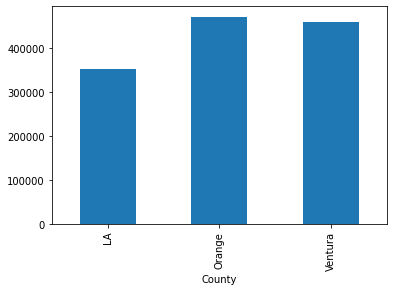

In [69]:
zillow.groupby(zillow.County).property_value.mean().plot(kind = 'bar')

**Hypothesis**

**County influences home value**

$H_0$: There is no relationship between County and home value

$H_a$: County influences home value

$a$: 0.05

In [70]:
# Since we are comparing a categorical and continuous variable, we must use T-test to compare the mean home values
# of different counties

a = 0.05


# from the vizualization above, we can see the home value in LA county is significantly lower, so we will compare the
# mean home value between la county and not la county

x1 = zillow[zillow.County =='LA'].property_value

x2 = zillow[zillow.County !='LA'].property_value


t, p = stats.ttest_ind(x1, x2)

t, p

if (t < 0) and (p < a):
    print('We reject the null hypothesis and the home value in LA county are significantly lower than other counties')
else:
    print('We fail to reject the null hypothesis')


We reject the null hypothesis and the home value in LA county are significantly lower than other counties


In [71]:
dummies = pd.get_dummies(zillow.County)

In [72]:
zillow = pd.concat([zillow, dummies], axis = 1)

In [73]:
zillow = zillow.drop(columns = 'County')

In [74]:
zillow.sort_values(by = 'numberofbedrooms', ascending = True)

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,lotsize,tax,property_value,tax_rate,LA,Orange,Ventura
187,1.0,0.0,3101.0,95993.0,740.0,28817.0,2399.69,188000.0,1.276431,1,0,0
3048,1.0,0.0,3101.0,95995.0,890.0,7339.0,1307.77,100000.0,1.307770,1,0,0
728,1.0,1.0,3101.0,96240.0,645.0,2273.0,2924.13,234049.0,1.249367,1,0,0
1845,1.0,1.0,3101.0,96284.0,806.0,2180.0,2621.84,213202.0,1.229745,1,0,0
5487,1.0,1.0,3101.0,95995.0,670.0,7339.0,1842.80,86000.0,2.142791,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14013,3.0,7.0,1286.0,97048.0,4274.0,29103.0,11560.16,152506.0,7.580135,0,1,0
11544,3.0,7.0,1286.0,96995.0,2604.0,5000.0,6342.24,620708.0,1.021775,0,1,0
11119,3.0,8.0,3101.0,96387.0,3308.0,19827.0,11795.09,966530.0,1.220354,1,0,0
12132,10.0,10.0,3101.0,96339.0,4294.0,16695.0,8871.35,812200.0,1.092262,1,0,0


In [75]:
zillow = zillow[zillow.numberofbedrooms<8]

In [76]:
zillow = zillow[zillow.numberofbathrooms < 7]

In [77]:
zillow = zillow[zillow.numberofbedrooms!=0]

In [78]:
zillow

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,lotsize,tax,property_value,tax_rate,LA,Orange,Ventura
0,2.0,3.0,3101.0,97318.0,1458.0,8284.0,2319.90,136104.0,1.704505,1,0,0
1,1.0,2.0,3101.0,96018.0,1421.0,6707.0,543.69,35606.0,1.526962,1,0,0
2,3.0,4.0,1286.0,96958.0,2541.0,4975.0,9819.72,880456.0,1.115299,0,1,0
3,2.0,3.0,3101.0,96037.0,1650.0,7300.0,7673.19,614000.0,1.249705,1,0,0
4,1.0,2.0,3101.0,96023.0,693.0,2908.0,3267.47,274237.0,1.191477,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15030,3.0,5.0,1286.0,97018.0,2526.0,7800.0,5718.72,458903.0,1.246172,0,1,0
15031,3.0,5.0,1286.0,97067.0,2735.0,7100.0,1465.88,115387.0,1.270403,0,1,0
15032,2.0,3.0,3101.0,96523.0,1536.0,8818.0,3519.78,297097.0,1.184724,1,0,0
15033,3.0,5.0,1286.0,97065.0,2655.0,6000.0,8065.50,746963.0,1.079772,0,1,0


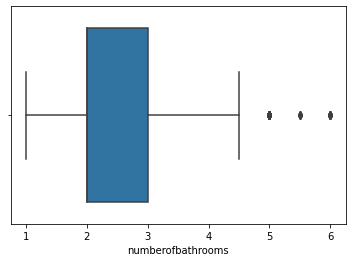

<AxesSubplot:xlabel='numberofbedrooms'>

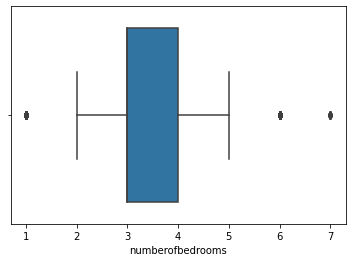

In [79]:
sns.boxplot(zillow.numberofbathrooms)
plt.show()

sns.boxplot(zillow.numberofbedrooms)

In [80]:
zillow.groupby(zillow.numberofbathrooms).numberofbathrooms.value_counts()

numberofbathrooms  numberofbathrooms
1.0                1.0                  2567
1.5                1.5                   233
2.0                2.0                  5989
2.5                2.5                  1116
3.0                3.0                  2821
3.5                3.5                   208
4.0                4.0                   434
4.5                4.5                    94
5.0                5.0                    91
5.5                5.5                     8
6.0                6.0                    14
Name: numberofbathrooms, dtype: int64

In [81]:
zillow.groupby(zillow.numberofbedrooms).numberofbedrooms.value_counts()

numberofbedrooms  numberofbedrooms
1.0               1.0                  157
2.0               2.0                 2230
3.0               3.0                 6290
4.0               4.0                 3928
5.0               5.0                  849
6.0               6.0                  109
7.0               7.0                   12
Name: numberofbedrooms, dtype: int64

In [82]:
zillow = zillow.drop(columns = 'tax_rate')


train, test, validate = wrangle.split_data(zillow)

In [83]:
train.shape, test.shape, validate.shape

train

,numberofbathrooms,numberofbedrooms,countyid,zipcode,size_in_squarefeet,lotsize,tax,property_value,LA,Orange,Ventura
6182,3.0,3.0,3101.0,96475.0,2212.0,16630.0,4521.73,378340.0,1,0,0
2569,3.5,3.0,1286.0,96987.0,1882.0,2994.0,6259.34,623706.0,0,1,0
10027,2.0,5.0,3101.0,96292.0,1106.0,4989.0,2694.62,213982.0,1,0,0
2148,2.0,4.0,1286.0,97026.0,1382.0,5858.0,3823.66,336673.0,0,1,0
4213,3.0,3.0,3101.0,97328.0,1886.0,8252.0,4272.84,223370.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3864,2.0,3.0,3101.0,96346.0,1550.0,7572.0,6156.57,497000.0,1,0,0
5796,1.0,5.0,3101.0,96515.0,2463.0,12385.0,1248.52,72223.0,1,0,0
4308,3.0,4.0,2061.0,96384.0,2300.0,6689.0,1998.70,121087.0,0,0,1
7277,2.0,3.0,3101.0,97319.0,1554.0,26509.0,2451.64,192897.0,1,0,0


## Exploration Phase

<Figure size 1080x1080 with 0 Axes>

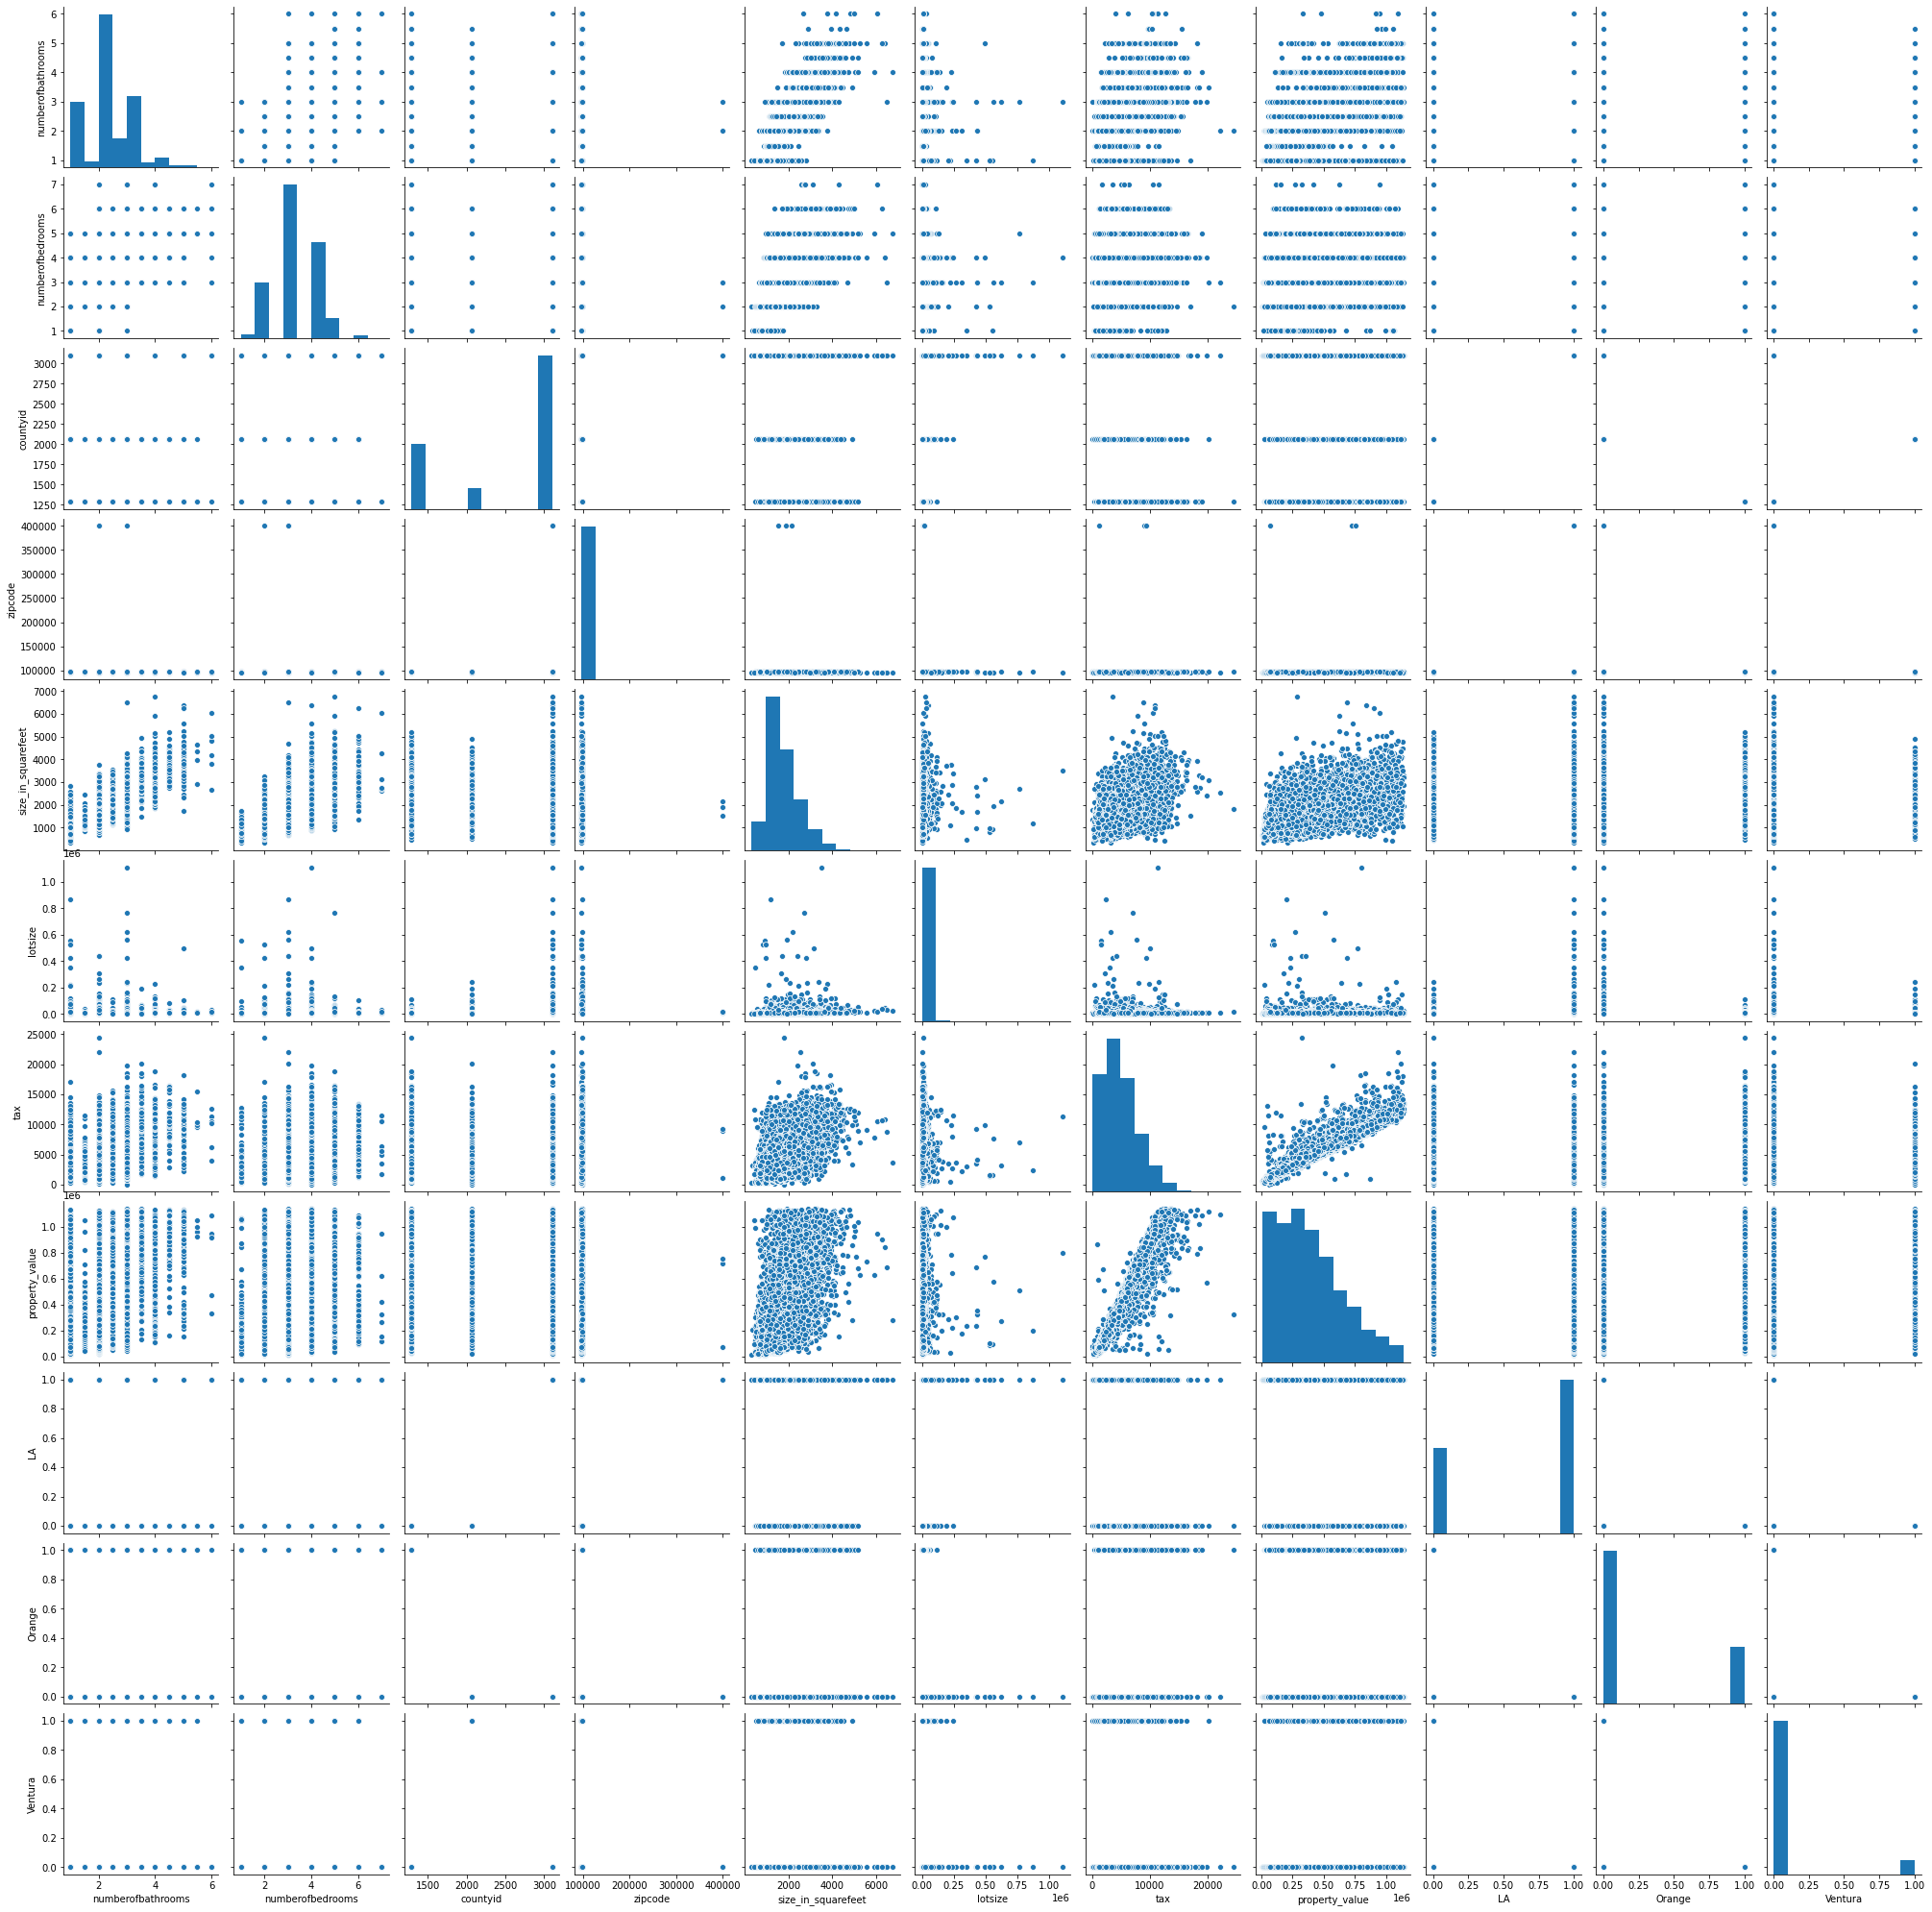

In [84]:
plt.figure(figsize = (15,15))

sns.pairplot(train)

<AxesSubplot:>

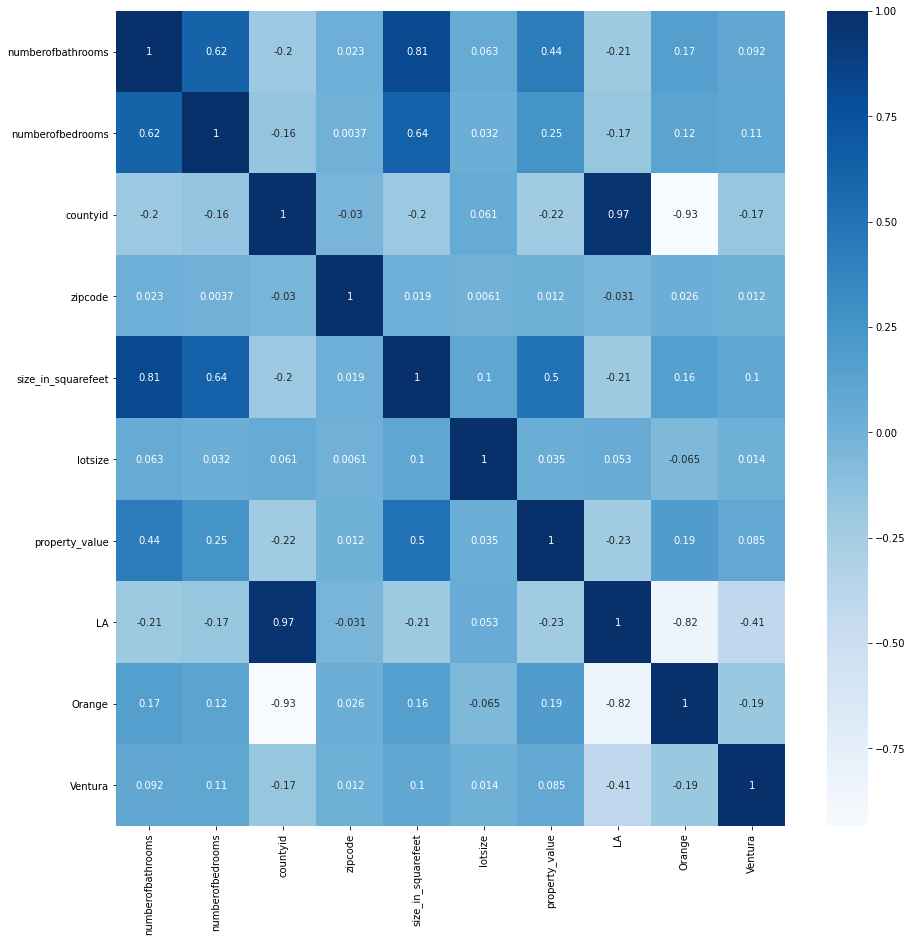

In [85]:

# lets plot a heat map of the correlation


plt.figure(figsize = (15,15))

sns.heatmap(train.drop(columns = [ 'tax']).corr(), cmap = 'Blues', annot = True)

### Takeaways:
- We can see a strong correlation between property value and full bath count, size in square feet, number of bathrooms, and number of bedrooms

### Hypothesis

**1. size of the single family unit in square feet affect the price of the property**

- both of these variables are continuous so, we must conduct pearson r hypothesis test

$H_0$: The size in square feet and the price of the property are independent of each other

$H_a$: The size in square feet and the price of the property are dependent of each other

In [86]:
from scipy import stats

In [87]:
# setting our significance level

a = 0.05

r, p = stats.pearsonr(train.size_in_squarefeet, train.property_value)

r, p

(0.5035744114308233, 0.0)

In [88]:
if p < a:
    print("We reject the null hypothesis")
else:
    print('we fail to reject the null hypothesis')

We reject the null hypothesis


### Takeaways:
- our p is low so we reject the null hypothesis that size in square feet and property value are independent of each other
- our r value os 0.53, indicating a correlation

<AxesSubplot:xlabel='numberofbathrooms'>

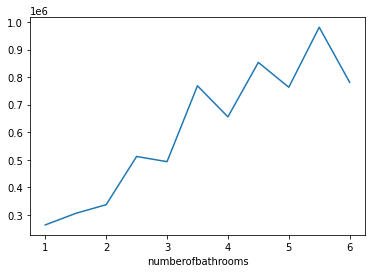

In [89]:
train.groupby(train.numberofbathrooms).property_value.mean().plot()

<AxesSubplot:xlabel='numberofbedrooms'>

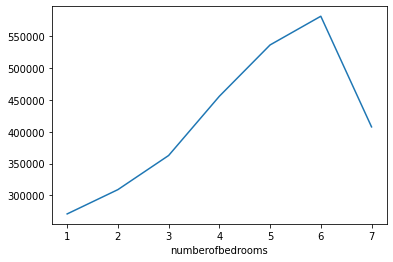

In [90]:
train.groupby(train.numberofbedrooms).property_value.mean().plot()

**the number of bedrooms has a strong relationship with the price of homes**

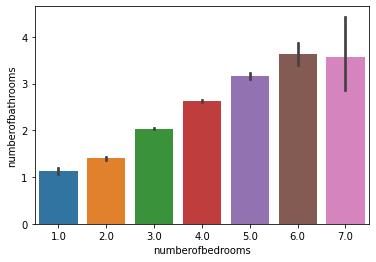

In [91]:
sns.barplot(data = train, y = 'numberofbathrooms', x = 'numberofbedrooms')
plt.show()

In [92]:
train.groupby(train.numberofbathrooms).numberofbathrooms.value_counts()

numberofbathrooms  numberofbathrooms
1.0                1.0                  1652
1.5                1.5                   158
2.0                2.0                  3832
2.5                2.5                   725
3.0                3.0                  1798
3.5                3.5                   142
4.0                4.0                   250
4.5                4.5                    60
5.0                5.0                    61
5.5                5.5                     4
6.0                6.0                     6
Name: numberofbathrooms, dtype: int64

<AxesSubplot:xlabel='numberofbathrooms'>

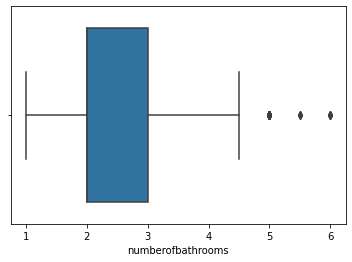

In [93]:
sns.boxplot(train.numberofbathrooms)

## Modeling
**Lets scale the data first**

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
x_train = train.drop(columns = ['tax', 'property_value'])
y_train = train[['property_value']]

x_validate = validate.drop(columns = ['tax', 'property_value'])
y_validate = validate[['property_value']]


x_test = test.drop(columns = ['tax', 'property_value'])
y_test = test[['property_value']]

In [96]:
scaler = MinMaxScaler()

cols_to_scale = x_train.columns

x_train_scaled, x_test_scaled, x_validate_scaled = wrangle.scale_data(x_train, x_test, x_validate, scaler = scaler,
                                                                      cols_to_scale = cols_to_scale)

In [97]:
x_train_scaled

,numberofbathrooms_scaled,numberofbedrooms_scaled,countyid_scaled,zipcode_scaled,size_in_squarefeet_scaled,lotsize_scaled,LA_scaled,Orange_scaled,Ventura_scaled
6182,0.4,0.333333,1.000000,0.001623,0.293313,0.014430,1.0,0.0,0.0
2569,0.5,0.333333,0.000000,0.003309,0.241991,0.002160,0.0,1.0,0.0
10027,0.2,0.666667,1.000000,0.001021,0.121306,0.003955,1.0,0.0,0.0
2148,0.2,0.500000,0.000000,0.003438,0.164230,0.004737,0.0,1.0,0.0
4213,0.4,0.333333,1.000000,0.004432,0.242613,0.006891,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
3864,0.2,0.333333,1.000000,0.001199,0.190358,0.006279,1.0,0.0,0.0
5796,0.0,0.666667,1.000000,0.001755,0.332348,0.010610,1.0,0.0,0.0
4308,0.4,0.500000,0.426997,0.001324,0.306998,0.005484,0.0,0.0,1.0
7277,0.2,0.333333,1.000000,0.004402,0.190980,0.023319,1.0,0.0,0.0


In [98]:
print(train[train.LA == 1].property_value.mean())

print(train[train.Orange == 1].property_value.mean())

print(train[train.Ventura == 1].property_value.mean())

348649.43374574144
472483.37637595256
464544.3631508678


In [99]:
print(train[train.LA == 1].property_value.min())

print(train[train.Orange == 1].property_value.min())

print(train[train.Ventura == 1].property_value.min())

10504.0
26372.0
21567.0


In [100]:
print(train[train.LA == 1].property_value.median())

print(train[train.Orange == 1].property_value.median())

print(train[train.Ventura == 1].property_value.median())

295437.0
451544.0
436154.0


### Lets build model

In [101]:
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE

### Baseline First

In [102]:
y_train.median()

property_value    348340.5
dtype: float64

In [103]:
## we will use the median as our baseline

baseline = y_train.median()


# predicting using our baseline
y_baseline_pred = np.full(len(y_train), baseline)

baseline_rmse = (mean_squared_error(y_train, y_baseline_pred)) ** (1/2)

baseline_rmse

263421.07475050795

In [104]:
x_vars = x_train_scaled[['numberofbathrooms_scaled', 'numberofbedrooms_scaled', 'size_in_squarefeet_scaled']]

x_vars

,numberofbathrooms_scaled,numberofbedrooms_scaled,size_in_squarefeet_scaled
6182,0.4,0.333333,0.293313
2569,0.5,0.333333,0.241991
10027,0.2,0.666667,0.121306
2148,0.2,0.500000,0.164230
4213,0.4,0.333333,0.242613
...,...,...,...
3864,0.2,0.333333,0.190358
5796,0.0,0.666667,0.332348
4308,0.4,0.500000,0.306998
7277,0.2,0.333333,0.190980


### Linear Regression Model

In [105]:
lm = LinearRegression(normalize = True)
lm = lm.fit(x_vars, y_train)

y_lm_pred = lm.predict(x_vars)

lm_rmse = (mean_squared_error(y_train, y_lm_pred)) **(1/2)

lm_rmse

222380.47648246484

In [106]:
xvs_lm = explained_variance_score(y_train, y_lm_pred)
xvs_lm

0.2669009857053225

### LassoLars

In [107]:
# create the object
lars = LassoLars(alpha = 0)


# fit the object
lars = lars.fit(x_vars, y_train)


# predict with the object
y_lars_pred = lars.predict(x_vars)


# calculate the rmse
lars_rmse = (mean_squared_error(y_train, y_lars_pred)) **(1/2)

lars_rmse

222380.47648246484

In [108]:
xvs_lars = explained_variance_score(y_train, y_lars_pred)
xvs_lars

0.2669009857053225

### Polynomial + Linear Reg

In [109]:
# lets try polynomial features with linear regression


# create polynomial object
pf = PolynomialFeatures(degree = 2)

# fitting the object
pf = pf.fit(x_vars)


# transforming our training data set
x_vars_squared = pf.transform(x_vars)



# lets get the Linear Regression

lm_squared = LinearRegression()


# fit the linear regression object

lm_squared = lm_squared.fit(x_vars_squared, y_train)

#predict with the object

y_lm_squared_pred = lm_squared.predict(x_vars_squared)


# lets get rmse

lm_squared_rmse = (mean_squared_error(y_train, y_lm_squared_pred)) **(1/2)

lm_squared_rmse

221842.40577922287

In [110]:
xvs_lm_squared = explained_variance_score(y_train, y_lm_squared_pred)
xvs_lm_squared

0.27044429933384884

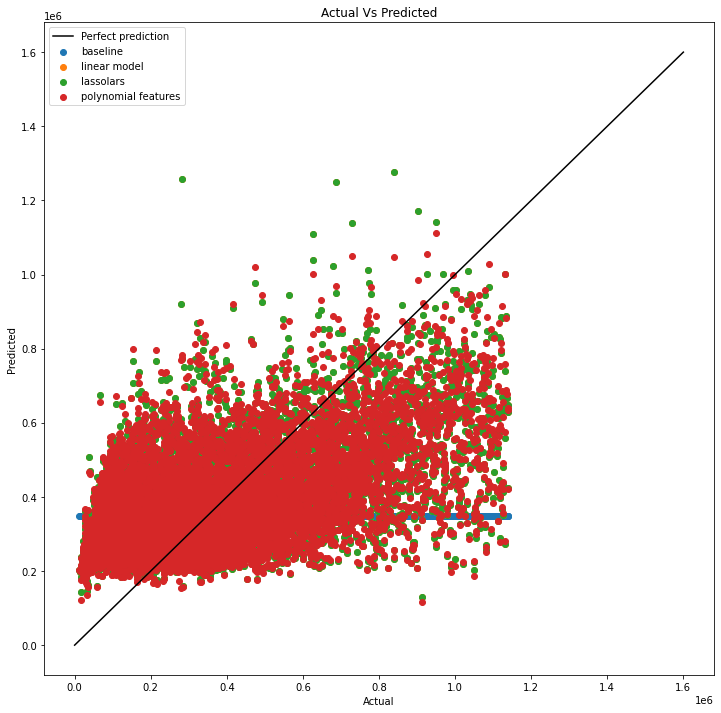

In [111]:
# lets try to plot these values

plt.figure(figsize = (12,12))
plt.scatter(y_train, y_baseline_pred, label = 'baseline')

plt.scatter(y_train, y_lm_pred, label = 'linear model')

plt.scatter(y_train, y_lars_pred, label = 'lassolars')


plt.scatter(y_train, y_lm_squared_pred, label = 'polynomial features')

plt.plot([0, 1600000], [0, 1600000], ls = "-" , c = 'black', label = 'Perfect prediction')

plt.xlabel("Actual")

plt.ylabel("Predicted")

plt.title('Actual Vs Predicted')

plt.legend()

plt.show()

## Linear Regression

In [112]:
## Lets try to use all the variables this time


# create the object

lm2 = LinearRegression(normalize = True)


# fit the object

lm2 = lm2.fit(x_train_scaled, y_train)


# predict with the object

y_lm2_pred = lm2.predict(x_train_scaled)


# rmse

lm2_rmse = (mean_squared_error(y_train, y_lm2_pred)) **(1/2)

lm2_rmse

220043.8657675072

In [113]:
xvs_lm2 = explained_variance_score(y_train, y_lm2_pred)
xvs_lm2

0.28222712192955535

## LassoLars


In [114]:
# create the object
lars2 = LassoLars(alpha = 0)


# fit the object
lars2 = lars2.fit(x_train_scaled, y_train)


# predict with the object
y_lars2_pred = lars2.predict(x_train_scaled)


# calculate the rmse
lars2_rmse = (mean_squared_error(y_train, y_lars2_pred)) **(1/2)

lars2_rmse

220032.83794069715

In [115]:
xvs_lars2 = explained_variance_score(y_train, y_lars2_pred)
xvs_lars2

0.2822977245020364

## Polynomial Features + Linear Reg

In [116]:
# create polynomial object
pf2 = PolynomialFeatures(degree = 2)

# fitting the object
pf2 = pf2.fit(x_train_scaled)


# transforming our training data set
x_train_scaled_squared = pf2.transform(x_train_scaled)



# lets get the Linear Regression

lm_squared2 = LinearRegression()


# fit the linear regression object

lm_squared2 = lm_squared2.fit(x_train_scaled_squared, y_train)

#predict with the object

y_lm_squared2_pred = lm_squared2.predict(x_train_scaled_squared)


# lets get rmse

lm_squared2_rmse = (mean_squared_error(y_train, y_lm_squared2_pred)) **(1/2)

lm_squared2_rmse

211822.63436910306

In [117]:
xvs_lm_squared2 = explained_variance_score(y_train, y_lm_squared2_pred)
xvs_lm_squared2

0.33485848955011044

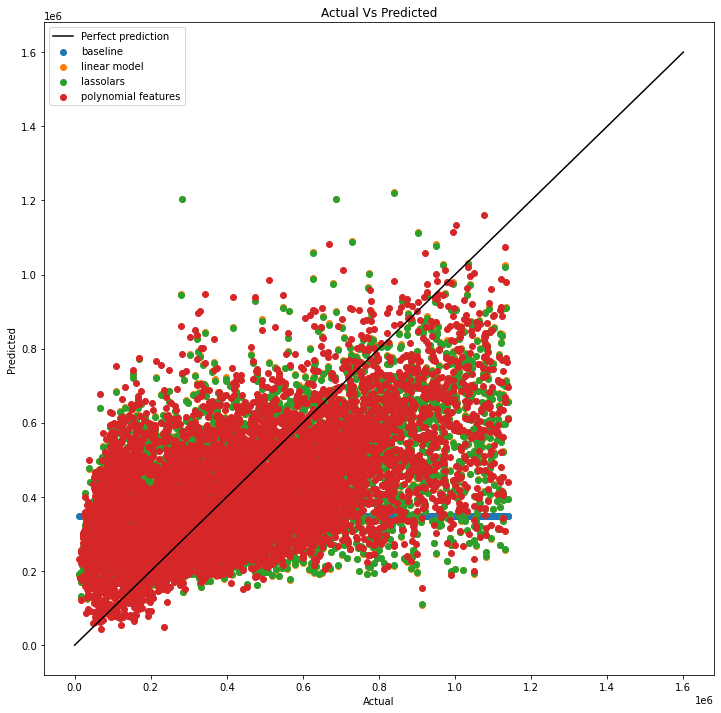

In [118]:
# lets try to plot these values

plt.figure(figsize = (12,12))
plt.scatter(y_train, y_baseline_pred, label = 'baseline')

plt.scatter(y_train, y_lm2_pred, label = 'linear model')

plt.scatter(y_train, y_lars2_pred, label = 'lassolars')


plt.scatter(y_train, y_lm_squared2_pred, label = 'polynomial features')

plt.plot([0, 1600000], [0, 1600000], ls = "-" , c = 'black', label = 'Perfect prediction')

plt.xlabel("Actual")

plt.ylabel("Predicted")

plt.title('Actual Vs Predicted')

plt.legend()

plt.show()

## We will validate with all of our model

In [125]:
# Validating with linear regression model
y_validate = validate[['property_value']]


x_validate_vars = x_validate_scaled[['numberofbathrooms_scaled', 'numberofbedrooms_scaled', 
                                     'size_in_squarefeet_scaled']]

y_validate_lm_pred = lm.predict(x_validate_vars)


val_lm_rmse = (mean_squared_error(y_validate, y_validate_lm_pred)) ** (1/2)

val_lm_rmse

223097.54024476113

In [126]:
# validate with lassolars

y_validate_lars_pred = lars.predict(x_validate_vars)


val_lars_rmse = (mean_squared_error(y_validate, y_validate_lars_pred)) ** (1/2)

val_lars_rmse

223097.54024476113

In [127]:
# lets try polynomial features with linear regression





# transforming our validate data set
x_val_vars_squared = pf.transform(x_validate_vars)










#predict with the object

y_val_lm_squared_pred = lm_squared.predict(x_val_vars_squared)


# lets get rmse

lm_squared_val_rmse = (mean_squared_error(y_validate, y_val_lm_squared_pred)) **(1/2)

lm_squared_val_rmse

222803.17305999834

In [128]:
xvs_val = explained_variance_score(y_validate, y_val_lm_squared_pred )

xvs_val

0.2613388295978988

## Our polynomial feature + linear reg model with 2nd degree performed better with our validate data
**So we will use this to run on our test data**


In [129]:
y_test = test[['property_value']]


x_test_vars = x_test_scaled[['numberofbathrooms_scaled', 'numberofbedrooms_scaled', 
                                     'size_in_squarefeet_scaled']]

In [130]:
# transforming our validate data set
x_test_vars_squared = pf.transform(x_test_vars)










#predict with the object

y_test_lm_squared_pred = lm_squared.predict(x_test_vars_squared)


# lets get rmse

lm_squared_test_rmse = (mean_squared_error(y_test, y_test_lm_squared_pred)) **(1/2)

lm_squared_test_rmse

222342.3603108586

In [131]:
xvs_lm_squared_test = explained_variance_score(y_test, y_test_lm_squared_pred )
xvs_lm_squared_test

0.2630356590334987

**Model performed well with test data**